# Exemplo de Viés e Variância com Mínimos Quadrados e Splines  

Este repositório apresenta um exemplo prático que ilustra o dilema de **viés-variância** utilizando as técnicas de ajuste de curvas por **Mínimos Quadrados** e **Splines**. O objetivo é demonstrar como diferentes métodos e níveis de complexidade afetam o viés, a variância e, consequentemente, a capacidade de generalização de um modelo.

---

## **Objetivo do Exemplo**
- **Mínimos Quadrados**: Demonstra o comportamento de um modelo com **alto viés**, incapaz de capturar a complexidade dos dados, levando a *underfitting*.  
- **Splines Cúbicas**: Demonstra o comportamento de um modelo com maior flexibilidade, mas que pode sofrer de **alta variância** em cenários de superajuste (*overfitting*).  


## **Descrição do Experimento**
1. **Geração dos Dados**: 
   - Criamos um conjunto de dados com uma relação conhecida entre as variáveis (por exemplo, \( y = \sin(x) + \text{ruído} \)).  

3. **Métricas Avaliadas**:  
   - Erro de Treinamento (Bias).  
   - Erro de Teste (Generalização).  
   - Comparação de erros sob diferentes níveis de complexidade do modelo.  

## Experimento

### Definições iniciais

- **`shuffle_data`:** Embaralha os dados para evitar vieses de ordenação.
- **`train_test_split`:** Divide os dados em conjuntos de treino e teste. É flexível para aceitar tanto uma proporção (`test_size < 1`) quanto um número absoluto de amostras para o conjunto de teste.
- **Dados sintéticos:** São gerados usando valores aleatórios de `x`, aplicando a função seno e adicionando ruído para simular variações reais nos dados.

In [6]:
# Importação das bibliotecas necessárias
import numpy as np  # Biblioteca para manipulação de arrays e funções matemáticas
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
from scipy.stats import linregress  # Função para regressão linear
from scipy.interpolate import UnivariateSpline  # Para interpolação suave de dados

# Função para embaralhar os dados
def shuffle_data(x, y):
    # Cria uma sequência de índices de 0 até o tamanho do array x
    Data_num = np.arange(x.shape[0])
    # Embaralha a sequência de índices de forma aleatória
    np.random.shuffle(Data_num)
    # Retorna os dados x e y embaralhados com base nos índices
    return x[Data_num], y[Data_num]

# Função para dividir os dados em treino e teste
def train_test_split(x, y, test_size=0.5, shuffle=True):
    # Embaralha os dados, se solicitado
    x, y = shuffle_data(x, y)
    
    # Caso o tamanho de teste seja uma proporção (número menor que 1)
    if test_size < 1:
        # Calcula o tamanho dos dados de treino com base na proporção
        train_ratio = len(x) - int(len(x) * test_size)
        # Divide os dados em treino e teste
        x_train, x_test = x[:train_ratio], x[train_ratio:]
        y_train, y_test = y[:train_ratio], y[train_ratio:]

    # Caso o tamanho de teste seja um número inteiro de amostras
    elif test_size in range(1, len(x)):
        # Divide os dados em treino e teste
        x_train, x_test = x[test_size:], x[:test_size]
        y_train, y_test = y[test_size:], y[:test_size]

    # Caso shuffle seja False, ordena os dados de treino e teste
    if not shuffle:
        # Ordena os dados de treino com base nos índices dos valores de x
        x_ind = x_train.argsort()
        x_train = x_train[x_ind]   
        y_train = y_train[x_ind]   

        # Ordena os dados de teste com base nos índices dos valores de x
        x_ind = x_test.argsort()
        x_test = x_test[x_ind]   
        y_test = y_test[x_ind]   

    # Retorna os dados de treino e teste
    return (
        x_train,
        x_test,
        y_train,
        y_test,
    )

# Gerando dados sintéticos para testar as funções
np.random.seed(42)  # Fixa a semente do gerador de números aleatórios para reprodutibilidade
x = np.sort(np.random.rand(100) * 10)  # Gera 100 valores aleatórios entre 0 e 10, ordenados
y = np.sin(x) + np.random.normal(0, 10, size=x.shape)  # Aplica a função seno e adiciona ruído aleatório

# Divide os dados em treino e teste, com 30% para teste e sem embaralhar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)


### Treino

1. **Regressão Linear (Mínimos Quadrados):**
   - Calcula uma reta que minimiza a soma dos quadrados das diferenças (erros) entre os pontos reais e os previstos.
   - `intercept` e `slope` representam o coeficiente linear (intercepto) e angular (inclinação) da reta.

2. **Spline Cúbico:**
   - Cria uma curva suave que passa (ou se aproxima) dos dados, ajustando-se melhor a padrões não lineares.
   - Parâmetros:
     - `k=3`: Define o grau do spline (cúbico).
     - `s=1`: Controla a suavidade do ajuste (valores maiores suavizam mais).

3. **Visualização:**
   - O gráfico compara os dados reais (`x_train`, `y_train`) com os valores previstos pelos dois modelos:
     - A linha azul mostra o ajuste linear.
     - A linha vermelha representa o ajuste por spline.

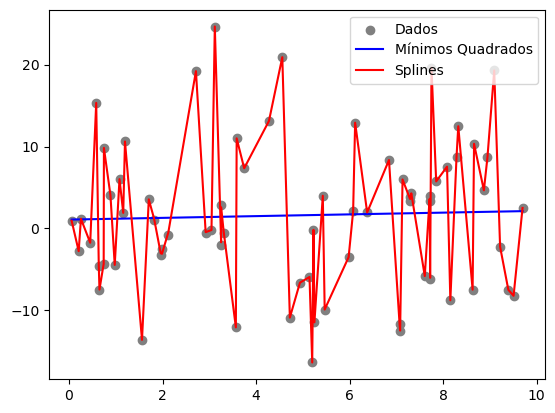

In [7]:

# Ajuste por mínimos quadrados (regressão linear)
linear_model = linregress(x_train, y_train)  # Realiza a regressão linear nos dados de treino (x_train, y_train)
y_linear_model = linear_model.intercept + linear_model.slope * x_train  # Calcula os valores previstos pela reta ajustada

# Ajuste por Splines
spline_model = UnivariateSpline(x_train, y_train, k=3, s=1)  # Ajusta um modelo de spline cúbico (k=3) com suavização (s=1)
y_pred_spline = spline_model(x_train)  # Calcula os valores previstos pelo modelo de spline

# Plot dos resultados
plt.scatter(x_train, y_train, label="Dados", color="gray")  # Plota os dados de treino como pontos cinzas
plt.plot(
    x_train,
    y_linear_model,
    label="Mínimos Quadrados",  # Rótulo para a regressão linear no gráfico
    color="blue",  # Define a cor da linha do modelo linear
)
plt.plot(x_train, y_pred_spline, label="Splines", color="red")  # Plota o modelo de spline em vermelho
plt.legend()  # Exibe a legenda no gráfico
plt.show()  # Mostra o gráfico com os dados e os dois modelos

1. **Métrica de Erro Absoluto Médio (RMSE):**
   - O RMSE é calculado como a média da raiz dos erros quadráticos para cada ponto.
   - Ele mede a discrepância média entre os valores previstos pelo modelo e os valores reais.

2. **Erro Absoluto Máximo:**
   - Calcula o maior erro absoluto encontrado entre os valores reais e previstos.
   - Essa métrica é útil para identificar quão grande foi o pior erro do modelo.

3. **Uso do `zip`:**
   - Combina os valores reais (`y_train`) com os valores previstos (`y_linear_model` ou `y_pred_spline`) para calcular os erros ponto a ponto.

4. **Propósito:**
   - Essas métricas ajudam a comparar o desempenho dos dois modelos (linear e spline) nos dados de treino.
   - O RMSE avalia o erro médio, enquanto o erro máximo identifica os piores casos.

In [8]:
# Cálculo do erro absoluto médio (Root Mean Square Error - RMSE) para o modelo linear
linear_rmse_train = np.mean(
    [((y_r - y_p) ** 2) ** 0.5 for y_r, y_p in zip(y_train, y_linear_model)]  
    # Calcula a raiz do erro quadrático para cada par de valores reais (y_r) e previstos (y_p)
    # Usa zip para iterar sobre y_train (reais) e y_linear_model (previstos pelo modelo linear)
)

# Cálculo do erro absoluto médio (RMSE) para o modelo de spline
spline_rmse_train = np.mean(
    [((y_r - y_p) ** 2) ** 0.5 for y_r, y_p in zip(y_train, y_pred_spline)]  
    # Aplica o mesmo processo para os valores previstos pelo modelo de spline (y_pred_spline)
)

# Cálculo do erro absoluto máximo (máximo entre os erros) para o modelo linear
linear_max_train = np.max(
    [((y_r - y_p) ** 2) ** 0.5 for y_r, y_p in zip(y_train, y_linear_model)]  
    # Calcula a raiz do erro quadrático para cada par e retorna o maior valor
)

# Cálculo do erro absoluto máximo para o modelo de spline
spline_max_train = np.max(
    [((y_r - y_p) ** 2) ** 0.5 for y_r, y_p in zip(y_train, y_pred_spline)]  
    # Aplica o mesmo processo para o modelo de spline
)

# Exibição dos resultados para o modelo linear
print("Mínimos Quadrados")
print("Erro absoluto médio", linear_rmse_train)  # Exibe o RMSE médio do modelo linear
print("Erro absoluto máximo", linear_max_train)  # Exibe o erro máximo do modelo linear

# Exibição dos resultados para o modelo de spline
print("\nSpline Cúbica")
print("Erro absoluto médio", spline_rmse_train)  # Exibe o RMSE médio do modelo de spline
print("Erro absoluto máximo", spline_max_train)  # Exibe o erro máximo do modelo de spline


Mínimos Quadrados
Erro absoluto médio 7.035005841303886
Erro absoluto máximo 23.257229109454187

Spline Cúbica
Erro absoluto médio 0.047574111193332796
Erro absoluto máximo 0.5981911228068868


### Validação

1. **Dados de Teste:**
   - Os pontos cinzas (`x_test`, `y_test`) representam o conjunto de teste, que é usado para validar a performance dos modelos.
   - Embora os modelos tenham sido ajustados com os dados de treino, o gráfico inclui os pontos reais do conjunto de teste para comparação.

2. **Valores Ajustados dos Modelos:**
   - **Regressão Linear:** A linha azul mostra os valores previstos pelo modelo linear ajustado com os dados de treino.
   - **Spline:** A linha vermelha mostra os valores previstos pelo modelo de spline, que geralmente segue padrões não lineares.

3. **Propósito do Gráfico:**
   - O gráfico permite visualizar como os modelos ajustados (regressão linear e spline) se comportam em relação aos dados reais do conjunto de teste.
   - Ajuda a avaliar a capacidade dos modelos em generalizar para novos dados.

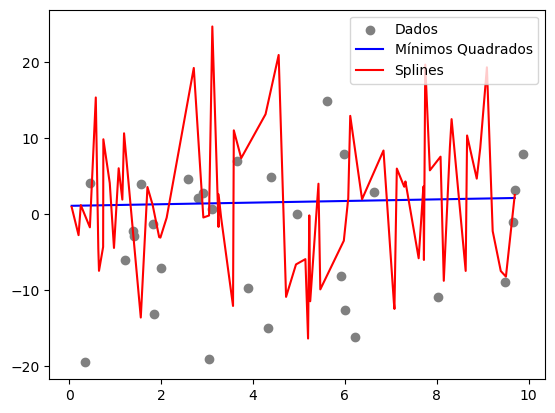

In [9]:
# Ajuste por mínimos quadrados (regressão linear)
y_linear_model = linear_model.intercept + linear_model.slope * x_train  
# Calcula os valores previstos para os dados de treino (x_train) usando o modelo linear ajustado anteriormente.

# Ajuste por Splines
y_pred_spline = spline_model(x_train)  
# Calcula os valores previstos para os dados de treino (x_train) usando o modelo de spline ajustado anteriormente.

# Plot dos resultados
plt.scatter(x_test, y_test, label="Dados", color="gray")  
# Plota os dados de teste (x_test, y_test) como pontos cinzas, representando os valores reais observados.

plt.plot(
    x_train,
    y_linear_model,
    label="Mínimos Quadrados",  # Rótulo para a regressão linear no gráfico
    color="blue",  # Define a cor da linha do modelo linear
)

plt.plot(
    x_train, 
    y_pred_spline, 
    label="Splines", 
    color="red"  # Define a cor da linha do modelo de spline
)

plt.legend()  # Exibe a legenda para identificar os modelos e os dados no gráfico
plt.show()  # Mostra o gráfico com os dados de teste e os modelos ajustados


1. **Erro Absoluto Médio (RMSE):**
   - Calcula a média da raiz dos erros quadráticos entre os valores reais (`y_test`) e os previstos pelos modelos (`y_linear_model` ou `y_pred_spline`).
   - Mede a precisão média do modelo.

2. **Erro Absoluto Máximo:**
   - Identifica o maior erro absoluto entre os valores reais e previstos.
   - É útil para avaliar o pior desempenho do modelo nos dados de teste.

3. **Diferença em relação ao conjunto de treino:**
   - Neste caso, as métricas são calculadas usando os **dados de teste** (`y_test`), que não foram usados no ajuste dos modelos.
   - Isso ajuda a avaliar como os modelos generalizam para novos dados, o que é essencial para medir sua qualidade.

4. **Uso do `zip`:**
   - Combina os valores reais (`y_test`) com os previstos (`y_linear_model` ou `y_pred_spline`) para calcular os erros ponto a ponto.

5. **Propósito:**
   - O código compara os erros dos modelos linear e spline nos dados de teste, fornecendo uma visão sobre qual modelo tem melhor desempenho.

In [10]:
# Cálculo do erro absoluto médio (Root Mean Square Error - RMSE) para o modelo linear nos dados de teste
linear_rmse_train = np.mean(
    [((y_r - y_p) ** 2) ** 0.5 for y_r, y_p in zip(y_test, y_linear_model)]  
    # Calcula a raiz do erro quadrático para cada par de valores reais (y_r) e previstos (y_p)
    # Usa zip para iterar sobre y_test (reais) e y_linear_model (previstos pelo modelo linear)
)

# Cálculo do erro absoluto médio (RMSE) para o modelo de spline nos dados de teste
spline_rmse_train = np.mean(
    [((y_r - y_p) ** 2) ** 0.5 for y_r, y_p in zip(y_test, y_pred_spline)]  
    # Aplica o mesmo processo para os valores previstos pelo modelo de spline (y_pred_spline)
)

# Cálculo do erro absoluto máximo (máximo entre os erros) para o modelo linear nos dados de teste
linear_max_train = np.max(
    [((y_r - y_p) ** 2) ** 0.5 for y_r, y_p in zip(y_test, y_linear_model)]  
    # Calcula a raiz do erro quadrático para cada par e retorna o maior valor
)

# Cálculo do erro absoluto máximo para o modelo de spline nos dados de teste
spline_max_train = np.max(
    [((y_r - y_p) ** 2) ** 0.5 for y_r, y_p in zip(y_test, y_pred_spline)]  
    # Aplica o mesmo processo para o modelo de spline
)

# Exibição dos resultados para o modelo linear
print("Mínimos Quadrados")
print("Erro absoluto médio", linear_rmse_train)  # Exibe o RMSE médio do modelo linear
print("Erro absoluto máximo", linear_max_train)  # Exibe o erro máximo do modelo linear

# Exibição dos resultados para o modelo de spline
print("\nSpline Cúbica")
print("Erro absoluto médio", spline_rmse_train)  # Exibe o RMSE médio do modelo de spline
print("Erro absoluto máximo", spline_max_train)  # Exibe o erro máximo do modelo de spline


Mínimos Quadrados
Erro absoluto médio 7.554765164165769
Erro absoluto máximo 20.611888467507264

Spline Cúbica
Erro absoluto médio 11.54786433231335
Erro absoluto máximo 40.79179188622011
